# 🏡 California House Price Prediction

**Objective**: Predict the median house value in California districts based on features such as income, house age, rooms, population, and location.

- **Dataset**: California Housing (from Scikit-learn).
- **Steps so far**:
  1. Download & save the dataset locally.
  2. Perform Exploratory Data Analysis (EDA).
  3. Preprocess the data (if needed).
  4. Train Regression models.
  5. Evaluate model performance.


## 📥 Step 1: Download California Housing Dataset
We use `fetch_california_housing` from Scikit-learn to load the dataset, 
rename the target column to `Target` for clarity, and save it into the `artifacts/` folder.


In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load California Housing dataset
california = fetch_california_housing(as_frame=True)
df = california.frame.copy()

# Rename target column for clarity
df.rename(columns={"MedHouseVal": "Target"}, inplace=True)

# Save dataset for reproducibility
df.to_csv("artifacts/california_housing.csv", index=False)

print("✅ California Housing dataset saved at artifacts/california_housing.csv")
df.head()


✅ California Housing dataset saved at artifacts/california_housing.csv


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 📊 Step 2: Exploratory Data Analysis (EDA)

We will explore the dataset to understand the distribution of each feature and the target variable.  
EDA steps:
1. Display basic summary statistics.
2. Plot histograms for each feature.
3. Visualize correlations using a heatmap.


In [2]:
# Display summary statistics
desc = df.describe().T
desc


,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
Target,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


In [3]:
desc.to_csv("artifacts/data_summary.csv")
print("✅ Summary statistics saved to artifacts/data_summary.csv")


✅ Summary statistics saved to artifacts/data_summary.csv


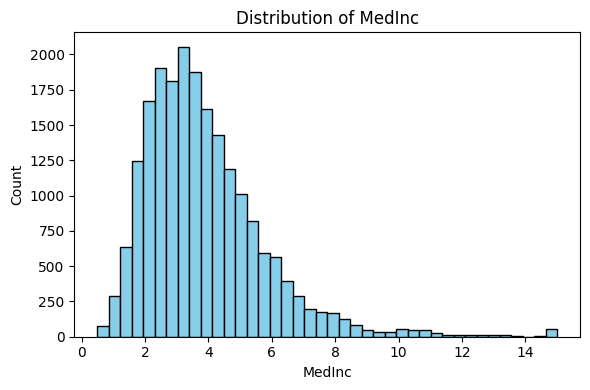

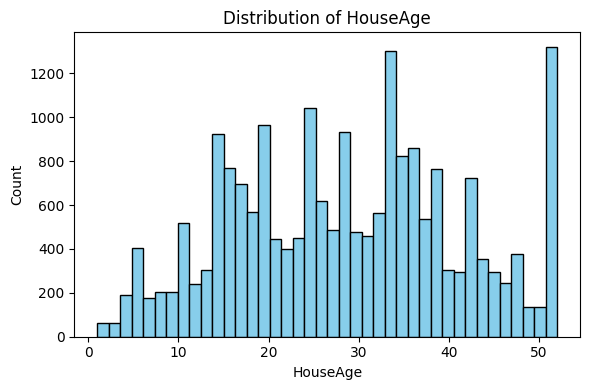

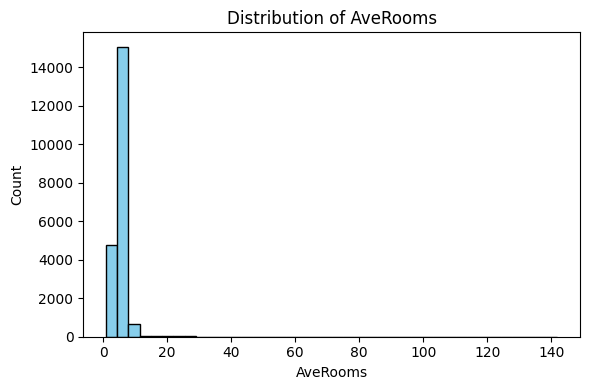

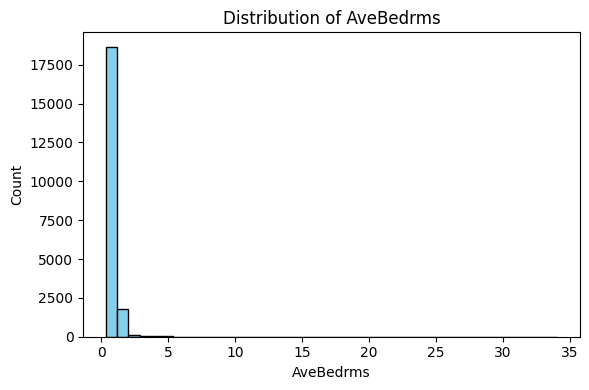

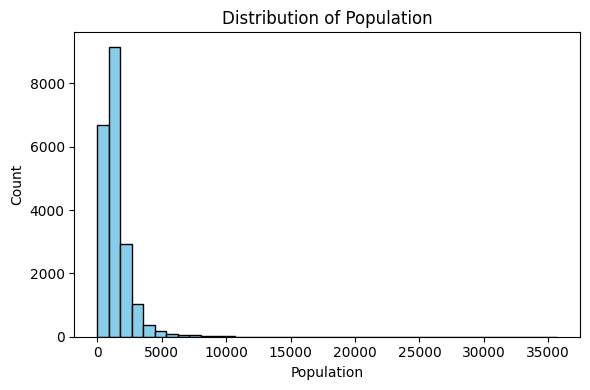

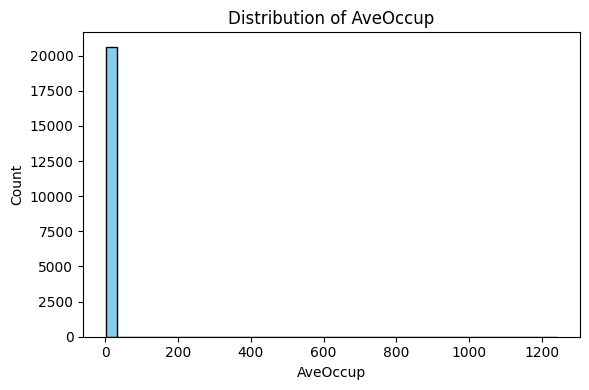

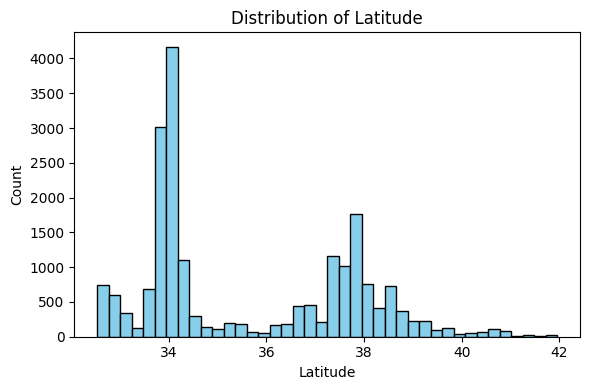

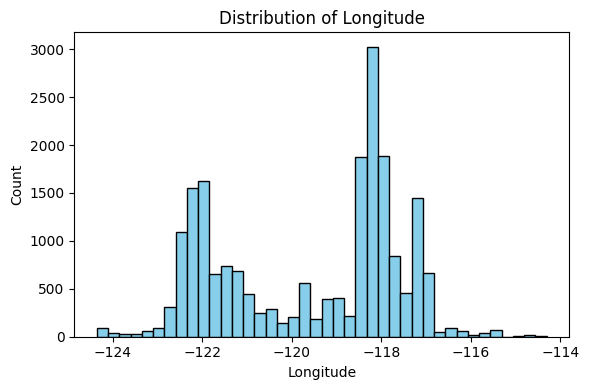

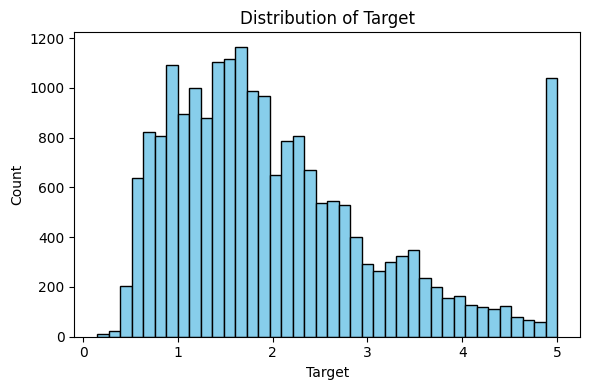

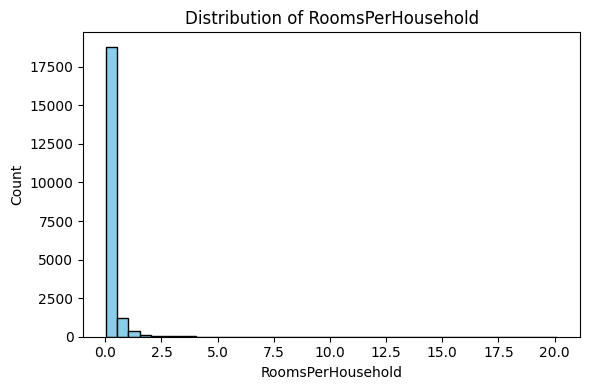

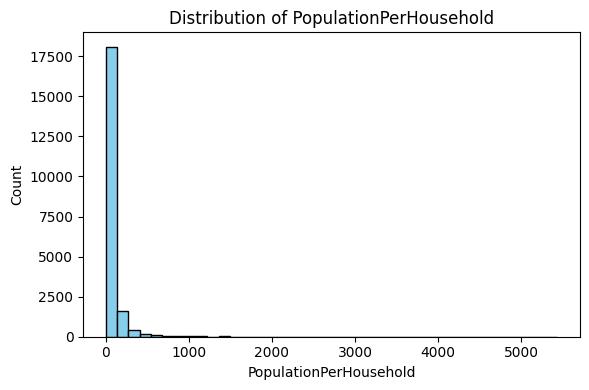

In [20]:
import matplotlib.pyplot as plt

for col in df.columns:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=40, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.savefig(f"plots/hist_{col}.png") 
    # save automatically
    plt.show()
    plt.close()  # close figure to avoid overlap


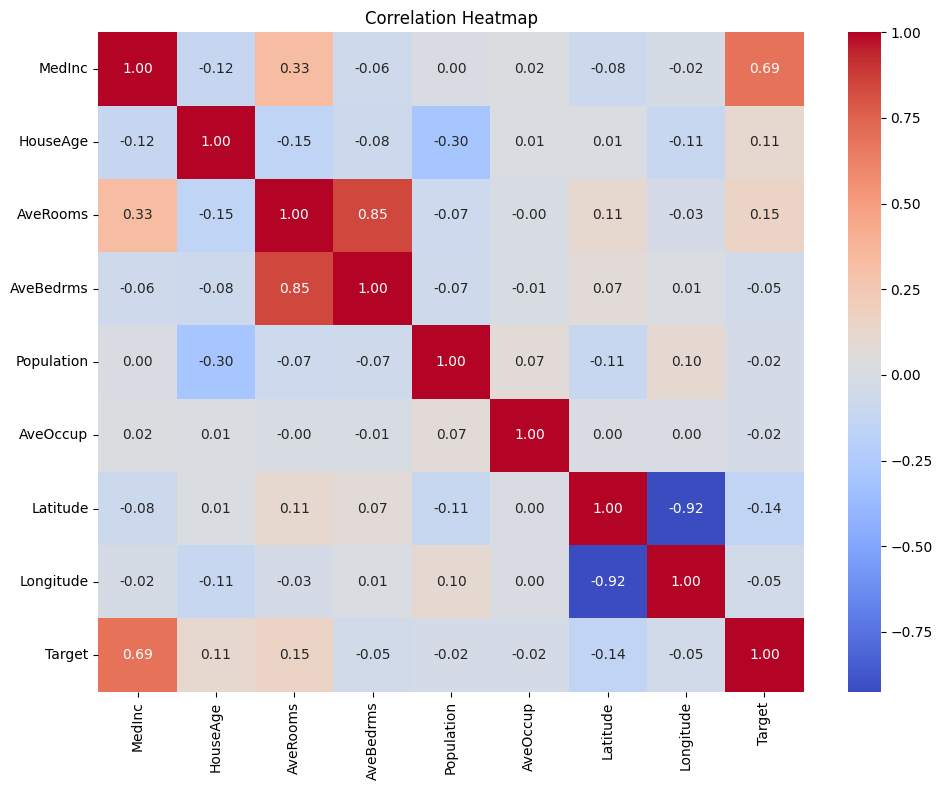

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("plots/correlation_heatmap.png")  # save automatically
plt.show()


## 🔧 Step 3: Feature Engineering & Preprocessing

In this step, we will:

1. Check for missing values.
2. Create any useful derived features.
3. Prepare the dataset for modeling (separate features and target).
4. Apply scaling to numeric features.


In [6]:
# Check for missing values
missing = df.isnull().sum()
missing


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

In [7]:
missing.to_csv("artifacts/missing_values.csv")
print("✅ Missing values report saved to artifacts/missing_values.csv")


✅ Missing values report saved to artifacts/missing_values.csv


In [8]:
# Create a couple of derived features
df['RoomsPerHousehold'] = df['AveRooms'] / df['HouseAge']  # example
df['PopulationPerHousehold'] = df['Population'] / df['HouseAge']

# Check new features
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target,RoomsPerHousehold,PopulationPerHousehold
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,0.170345,7.853659
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,0.297054,114.333333
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,0.159387,9.538462
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,0.111872,10.730769
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,0.120805,10.865385


In [9]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop('Target', axis=1)
y = df['Target']

# Split into training and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("✅ Data split into training and test sets:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)


✅ Data split into training and test sets:
X_train: (16512, 10) X_test: (4128, 10)


In [10]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Features scaled using StandardScaler")


✅ Features scaled using StandardScaler


## 🤖 Step 4: Train Regression Models & Evaluate

We will train the following models:
1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. Random Forest Regressor

For each model, we will:
- Fit on the training set
- Predict on the test set
- Evaluate using **MAE, MSE, RMSE, R²**
- Save residual and parity plots


In [11]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import joblib
import json


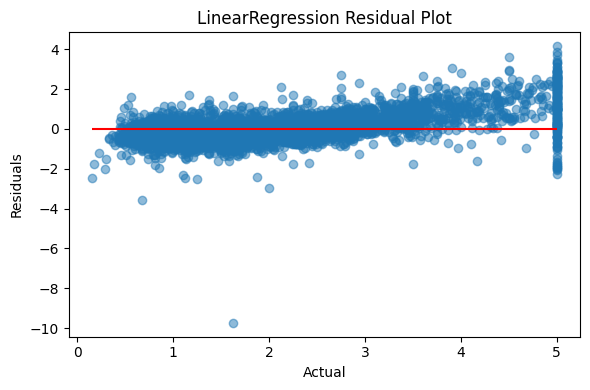

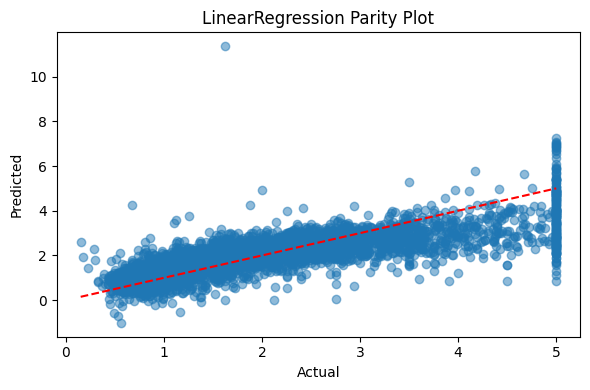

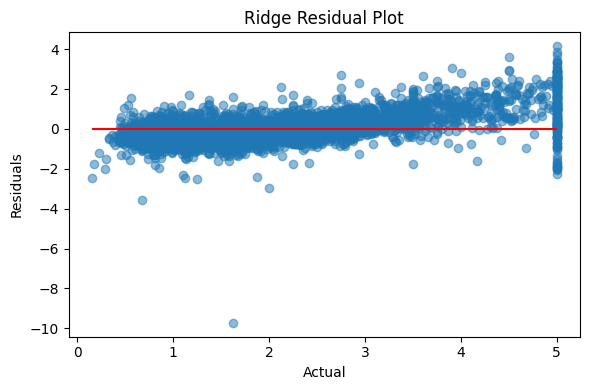

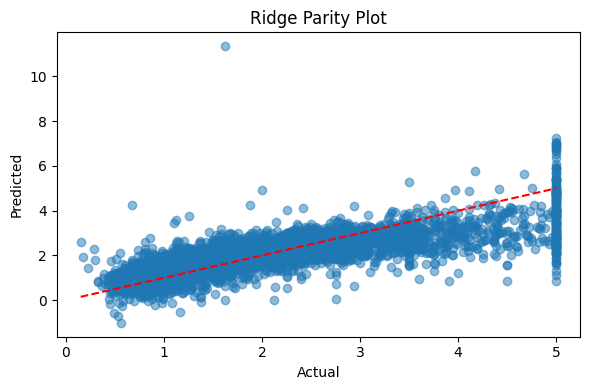

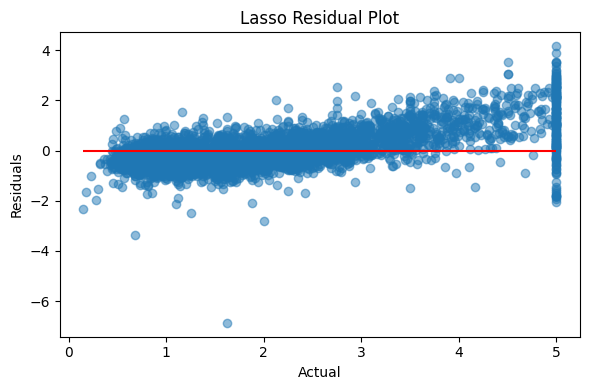

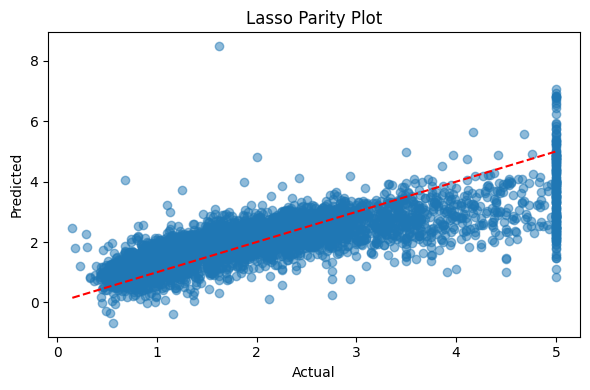

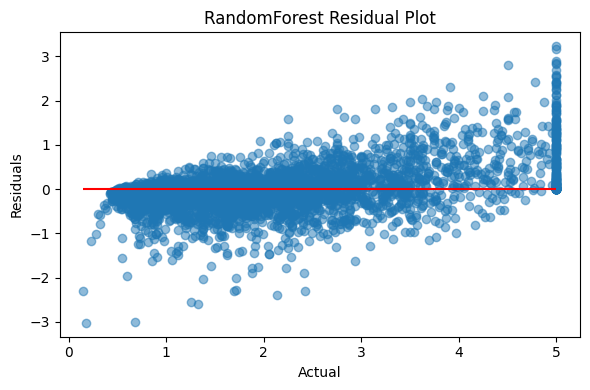

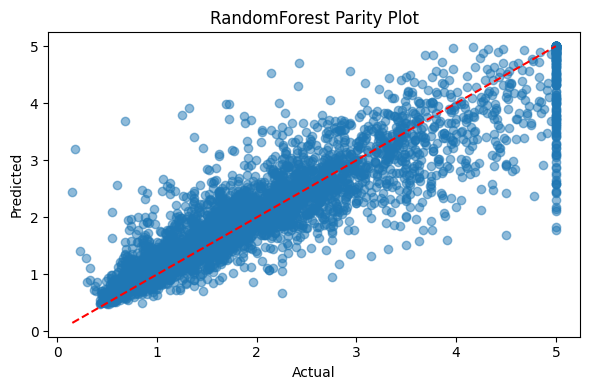

✅ Models trained, evaluated, plots saved, and models persisted!


In [21]:
# Define models
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0, random_state=42),
    "Lasso": Lasso(alpha=0.01, random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Dictionary to store results
results = {}

# Train, predict, evaluate
for name, model in models.items():
    # Fit model
    model.fit(X_train_scaled, y_train)
    
    # Predict
    y_pred = model.predict(X_test_scaled)
    
    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}
    
    # Residual plot
    plt.figure(figsize=(6,4))
    plt.scatter(y_test, y_test - y_pred, alpha=0.5)
    plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r')
    plt.xlabel("Actual")
    plt.ylabel("Residuals")
    plt.title(f"{name} Residual Plot")
    plt.tight_layout()
    plt.savefig(f"plots/{name}_residuals.png")
    plt.show()
    plt.close()
    
    # Parity plot (Actual vs Predicted)
    plt.figure(figsize=(6,4))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{name} Parity Plot")
    plt.tight_layout()
    plt.savefig(f"plots/{name}_parity.png")
    plt.show()
    plt.close()
    
    # Save model
    joblib.dump(model, f"models/{name}_model.joblib")

print("✅ Models trained, evaluated, plots saved, and models persisted!")


In [13]:
# Save results to JSON
with open("artifacts/model_metrics.json", "w") as f:
    json.dump(results, f, indent=4)

# Display results
results


{'LinearRegression': {'MAE': np.float64(0.5330171274785506),
  'MSE': np.float64(0.5548779916978083),
  'RMSE': np.float64(0.7449013301758887),
  'R2': 0.5765612103461931},
 'Ridge': {'MAE': np.float64(0.5330108890126269),
  'MSE': np.float64(0.5548424967470981),
  'RMSE': np.float64(0.7448775045248031),
  'R2': 0.5765882972719542},
 'Lasso': {'MAE': np.float64(0.5353261423609051),
  'MSE': np.float64(0.5482548967938964),
  'RMSE': np.float64(0.7404423656125414),
  'R2': 0.5816154300698727},
 'RandomForest': {'MAE': np.float64(0.3334423493217055),
  'MSE': np.float64(0.2649151990253861),
  'RMSE': np.float64(0.5146991344711842),
  'R2': 0.7978377717000918}}

## 📌 Step 5: Feature Importance & Top Coefficients

We will visualize:
1. **Random Forest Feature Importance** – which features contribute most to predictions.
2. **Ridge & Lasso Coefficients** – impact of each feature in linear models.

This adds interpretability to our models, a key portfolio highlight.


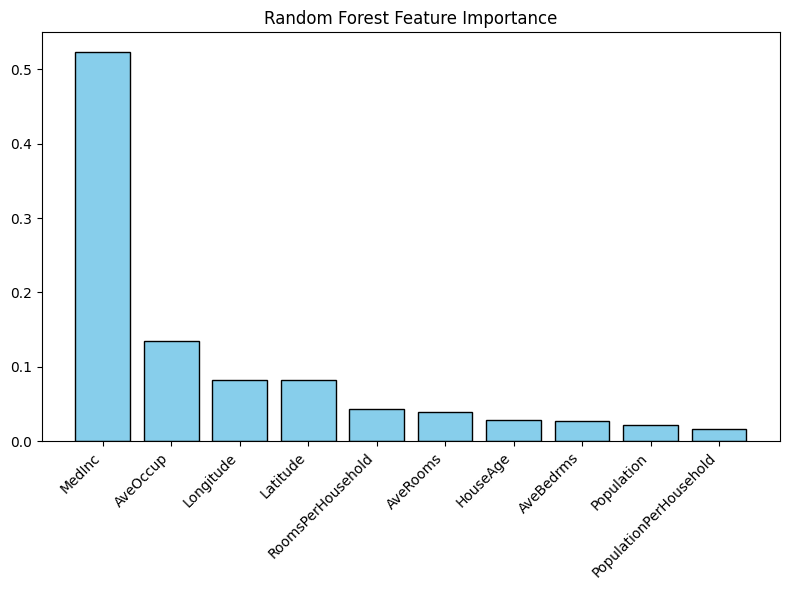

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Load trained Random Forest model
rf_model = joblib.load("models/RandomForest_model.joblib")

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(8,6))
plt.bar(range(len(feature_names)), importances[indices], color='skyblue', edgecolor='black')
plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=45, ha='right')
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.savefig("plots/RandomForest_feature_importance.png")
plt.show()


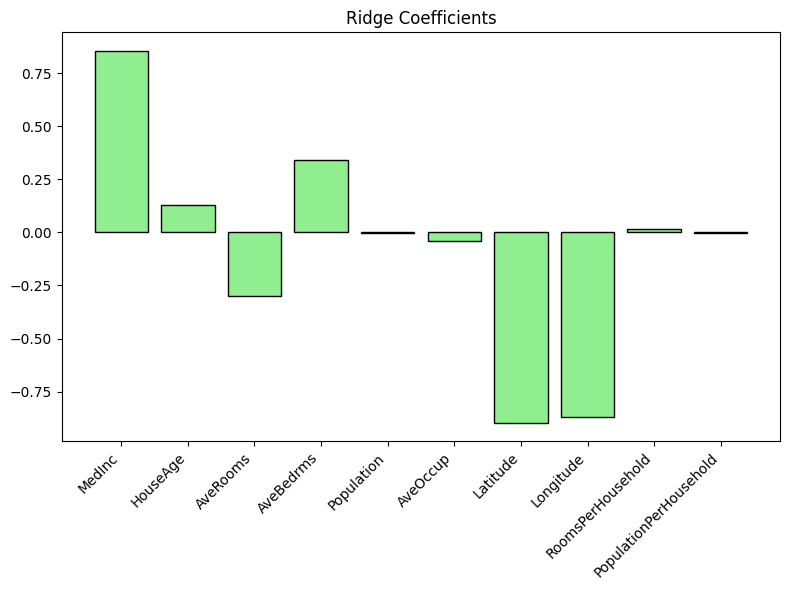

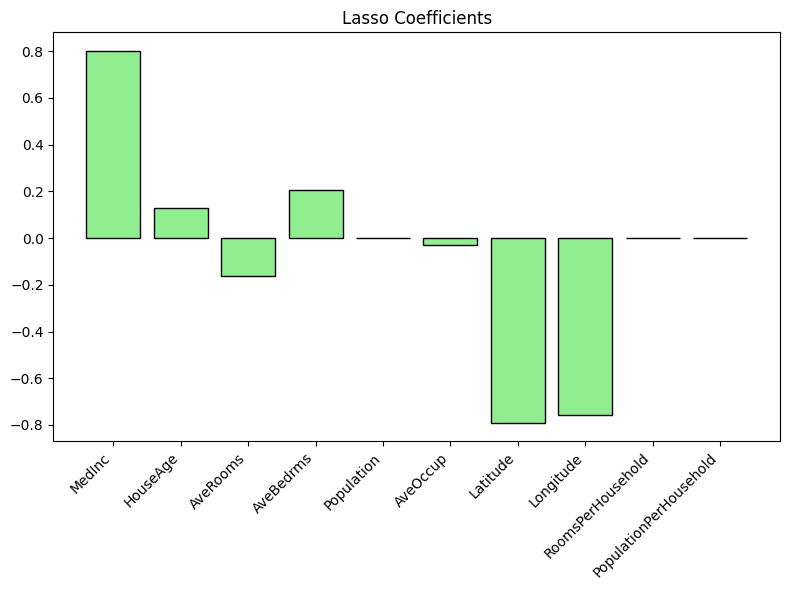

In [15]:
# Load trained Ridge and Lasso models
ridge_model = joblib.load("models/Ridge_model.joblib")
lasso_model = joblib.load("models/Lasso_model.joblib")

# Function to plot coefficients
def plot_coefficients(model, model_name):
    coefs = model.coef_
    plt.figure(figsize=(8,6))
    plt.bar(X.columns, coefs, color='lightgreen', edgecolor='black')
    plt.xticks(rotation=45, ha='right')
    plt.title(f"{model_name} Coefficients")
    plt.tight_layout()
    plt.savefig(f"plots/{model_name}_coefficients.png")
    plt.show()

plot_coefficients(ridge_model, "Ridge")
plot_coefficients(lasso_model, "Lasso")


## 📊 Model Comparison: R² Scores

To visually compare the performance of all trained models, we plot the **R² scores** for each model.  

- **Purpose:** Quickly identify the best-performing model.  
- **Interpretation:** Higher R² indicates the model explains more variance in house prices.  
- Random Forest is expected to stand out as the top performer.  
- The plot will also be saved automatically in `plots/model_r2_comparison.png`.


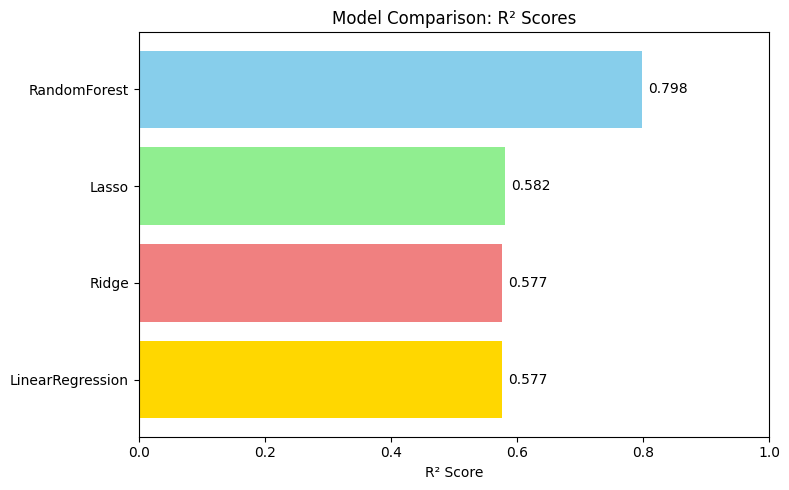

In [19]:
import matplotlib.pyplot as plt

# Model names and their R² scores
models = ['RandomForest', 'Lasso', 'Ridge', 'LinearRegression']
r2_scores = [0.797838, 0.581615, 0.576588, 0.576561]

# Plot
plt.figure(figsize=(8,5))
bars = plt.barh(models, r2_scores, color=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
plt.xlim(0, 1)
plt.xlabel('R² Score')
plt.title('Model Comparison: R² Scores')
plt.gca().invert_yaxis()  # highest at top

# Annotate bars with values
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width:.3f}', va='center')

plt.tight_layout()
plt.savefig("plots/model_r2_comparison.png")  # save automatically
plt.show()


## 🏁 Step 6: Summary & Final Model Export

In this step, we will:
1. Identify the best-performing model.
2. Save the model for future use.
3. Save final metrics summary for reporting.
4. Highlight key insights for your portfolio.


In [16]:
# Load metrics
import json

with open("artifacts/model_metrics.json", "r") as f:
    metrics = json.load(f)

# Find model with highest R²
best_model_name = max(metrics, key=lambda x: metrics[x]['R2'])
best_model_r2 = metrics[best_model_name]['R2']

print(f"✅ Best model: {best_model_name} with R² = {best_model_r2:.3f}")


✅ Best model: RandomForest with R² = 0.798


In [17]:
import shutil

# Copy the best model to a clear name
shutil.copyfile(f"models/{best_model_name}_model.joblib", "models/best_model.joblib")
print(f"✅ Best model saved as 'models/best_model.joblib'")


✅ Best model saved as 'models/best_model.joblib'


In [18]:
# Convert metrics to a nice dataframe for summary
summary_df = pd.DataFrame(metrics).T
summary_df = summary_df.sort_values(by='R2', ascending=False)
summary_df.to_csv("artifacts/final_model_metrics.csv")

print("✅ Final metrics saved to 'artifacts/final_model_metrics.csv'")
summary_df


✅ Final metrics saved to 'artifacts/final_model_metrics.csv'


,MAE,MSE,RMSE,R2
RandomForest,0.333442,0.264915,0.514699,0.797838
Lasso,0.535326,0.548255,0.740442,0.581615
Ridge,0.533011,0.554842,0.744878,0.576588
LinearRegression,0.533017,0.554878,0.744901,0.576561


## 🏁 Final Conclusion

In this project, we built a complete **House Price Prediction** pipeline using the California Housing dataset.  

### Key Steps & Highlights:
- **Data Understanding & EDA:** Explored feature distributions, correlations, and key predictors such as `MedInc`, `AveRooms`, `Latitude`, and `Longitude`.
- **Feature Engineering & Preprocessing:** Created derived features (`RoomsPerHousehold`, `PopulationPerHousehold`) and scaled numeric data.
- **Modeling & Evaluation:** Trained Linear Regression, Ridge, Lasso, and Random Forest models.  
- **Performance Metrics:**

| Model              | MAE     | MSE     | RMSE    | R²       |
|------------------ |--------|--------|--------|----------|
| Random Forest      | 0.333  | 0.265  | 0.515  | 0.798 ✅ |
| Lasso              | 0.535  | 0.548  | 0.740  | 0.582    |
| Ridge              | 0.533  | 0.555  | 0.745  | 0.577    |
| Linear Regression  | 0.533  | 0.555  | 0.745  | 0.577    |

- **Best Model:** Random Forest  
  - Highest R² = **0.798**  
  - Lowest RMSE ≈ **0.515**  
  - Lowest MAE ≈ **0.333**

### Visual Summary:
- R² comparison plot clearly shows Random Forest as the top-performing model:  
![R² Comparison](plots/model_r2_comparison.png)

### Interpretability & Insights:
- Feature importance from Random Forest shows which factors most influence house prices.  
- Ridge & Lasso coefficients provide insights into linear relationships.  
- Residual and parity plots confirm Random Forest predictions closely match actual values.

### Reproducibility:
- All models, plots, and metrics are saved in structured folders (`models/`, `plots/`, `artifacts/`) for easy reference.

**Conclusion:**  
This notebook demonstrates a **full ML workflow** from data preprocessing to model evaluation and interpretation, producing a robust, visually supported, and portfolio-ready house price prediction project.
